In [ ]:
pip install kagglehub pandas numpy matplotlib seaborn scikit-learn

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import plotly.express as px


# Upload the file manually
from google.colab import files
uploaded = files.upload()

# Load dataset (assuming your uploaded file is 'train.csv')
df = pd.read_csv('Titanic-Dataset.csv')

# View basic info
print(df.head())
print(df.info())
print(df.describe())


Saving Titanic-Dataset.csv to Titanic-Dataset (2).csv
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4

In [19]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [20]:
# Fill Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin (too many missing values)
df.drop(columns=['Cabin'], inplace=True)

# Check again
print(df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


<ipython-input-20-b7ffed427adb>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-20-b7ffed427adb>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [21]:
# Encode Sex column (male: 0, female: 1)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode Embarked
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


In [22]:
from sklearn.preprocessing import StandardScaler

# Choose numeric columns to scale
num_cols = ['Age', 'Fare']

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex       Age  SibSp  \
0                            Braund, Mr. Owen Harris    0 -0.565736      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  0.663861      1   
2                             Heikkinen, Miss. Laina    1 -0.258337      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  0.433312      1   
4                           Allen, Mr. William Henry    0  0.433312      0   

   Parch            Ticket      Fare  Embarked_Q  Embarked_S  
0      0         A/5 21171 -0.502445       False        True  
1      0          PC 17599  0.786845       False       False  
2      0  STON/O2. 3101282 -0.488854       False        True  
3      0            113803  0.420730       False        True  

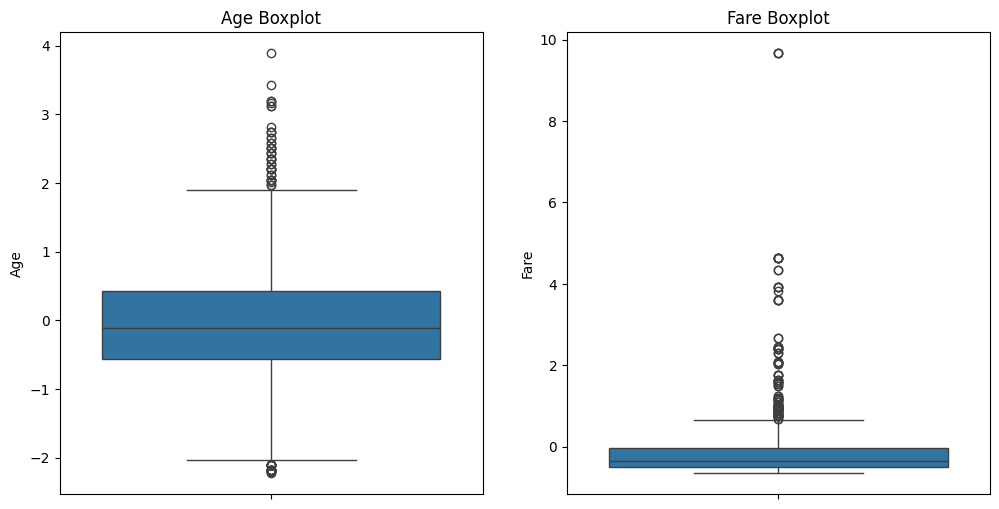

In [23]:
# Boxplots for Age and Fare
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(y=df['Age'])
plt.title('Age Boxplot')

plt.subplot(1,2,2)
sns.boxplot(y=df['Fare'])
plt.title('Fare Boxplot')

plt.show()


In [24]:
# Remove outliers function
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

# Remove outliers for Age and Fare
df = remove_outliers_iqr(df, 'Age')
df = remove_outliers_iqr(df, 'Fare')

print(df.shape)


(718, 12)



--- Summary Statistics ---

       PassengerId    Survived      Pclass         Sex         Age  \
count   718.000000  718.000000  718.000000  718.000000  718.000000   
mean    447.883008    0.334262    2.512535    0.318942   -0.098537   
std     259.549777    0.472061    0.715818    0.466391    0.769449   
min       1.000000    0.000000    1.000000    0.000000   -2.025883   
25%     220.250000    0.000000    2.000000    0.000000   -0.565736   
50%     447.500000    0.000000    3.000000    0.000000   -0.104637   
75%     673.500000    1.000000    3.000000    1.000000    0.270006   
max     891.000000    1.000000    3.000000    1.000000    1.893459   

            SibSp       Parch        Fare  
count  718.000000  718.000000  718.000000  
mean     0.413649    0.317549   -0.302242  
std      0.855001    0.784792    0.266674  
min      0.000000    0.000000   -0.648422  
25%      0.000000    0.000000   -0.489568  
50%      0.000000    0.000000   -0.411839  
75%      1.000000    0.000000   

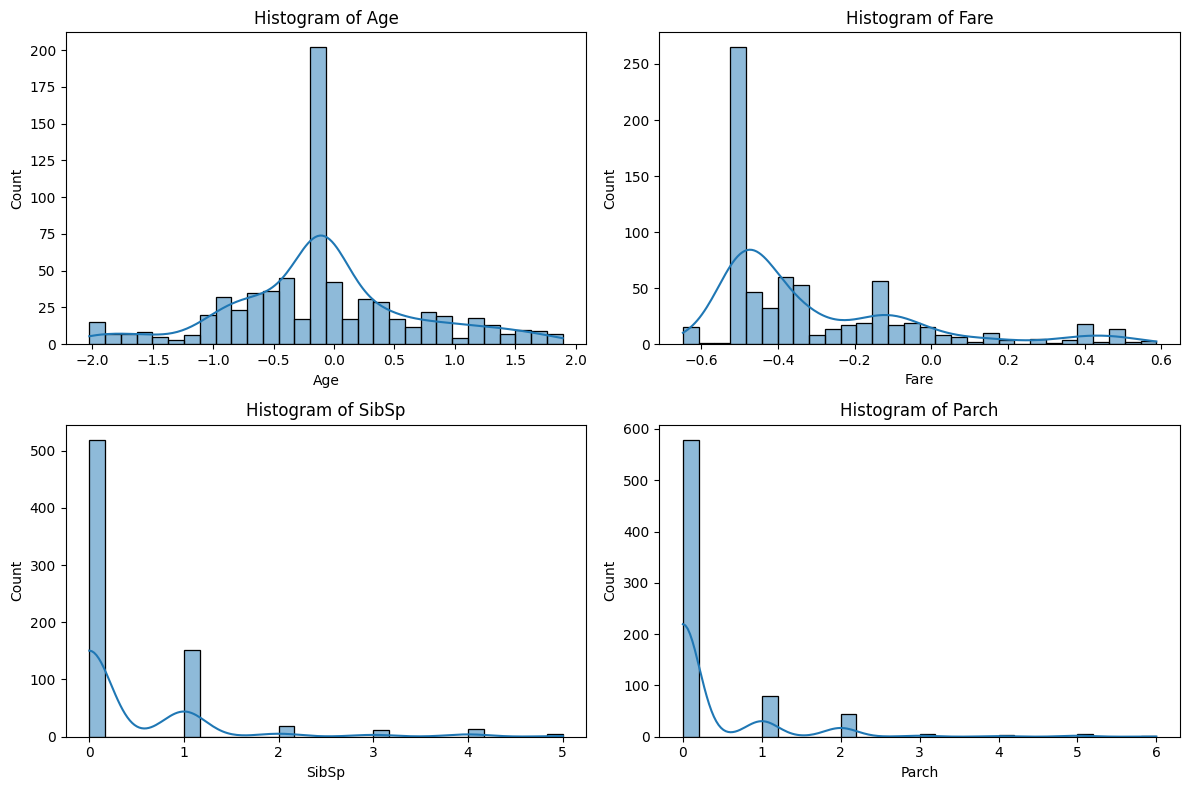

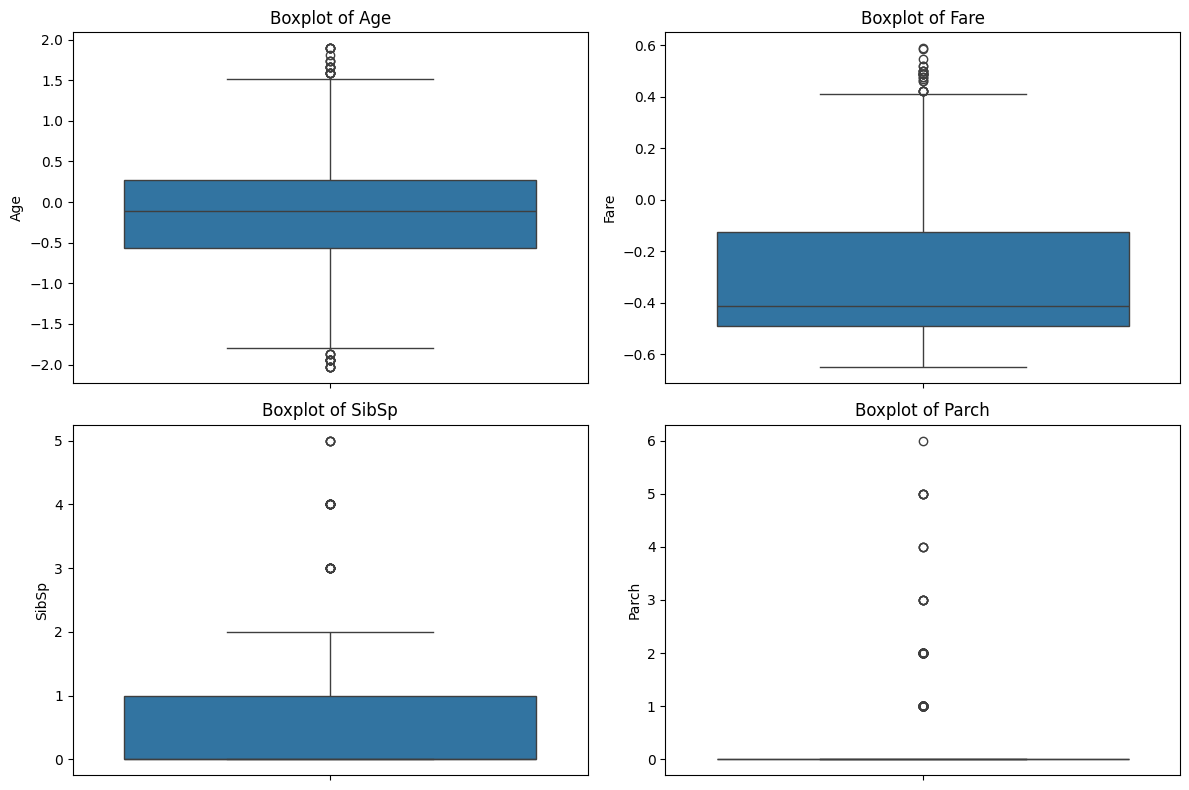

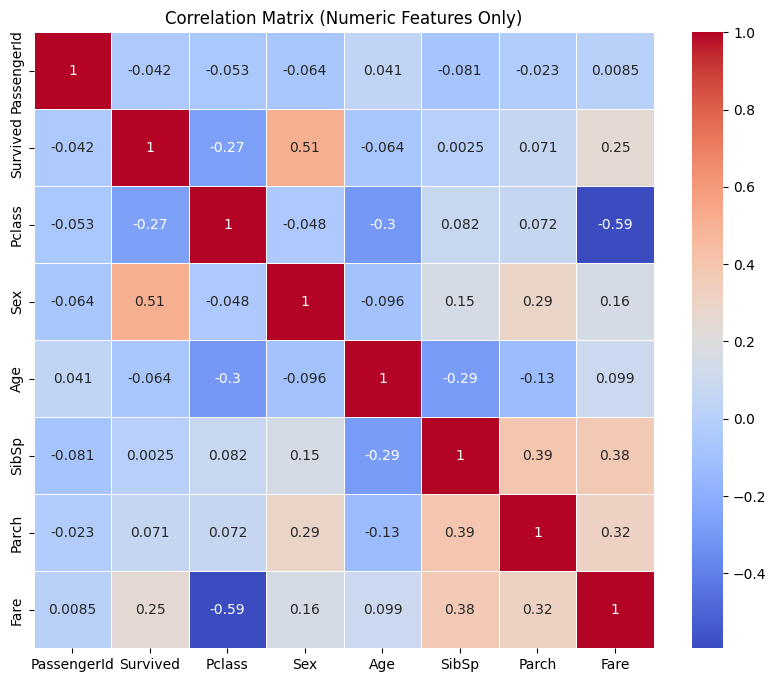

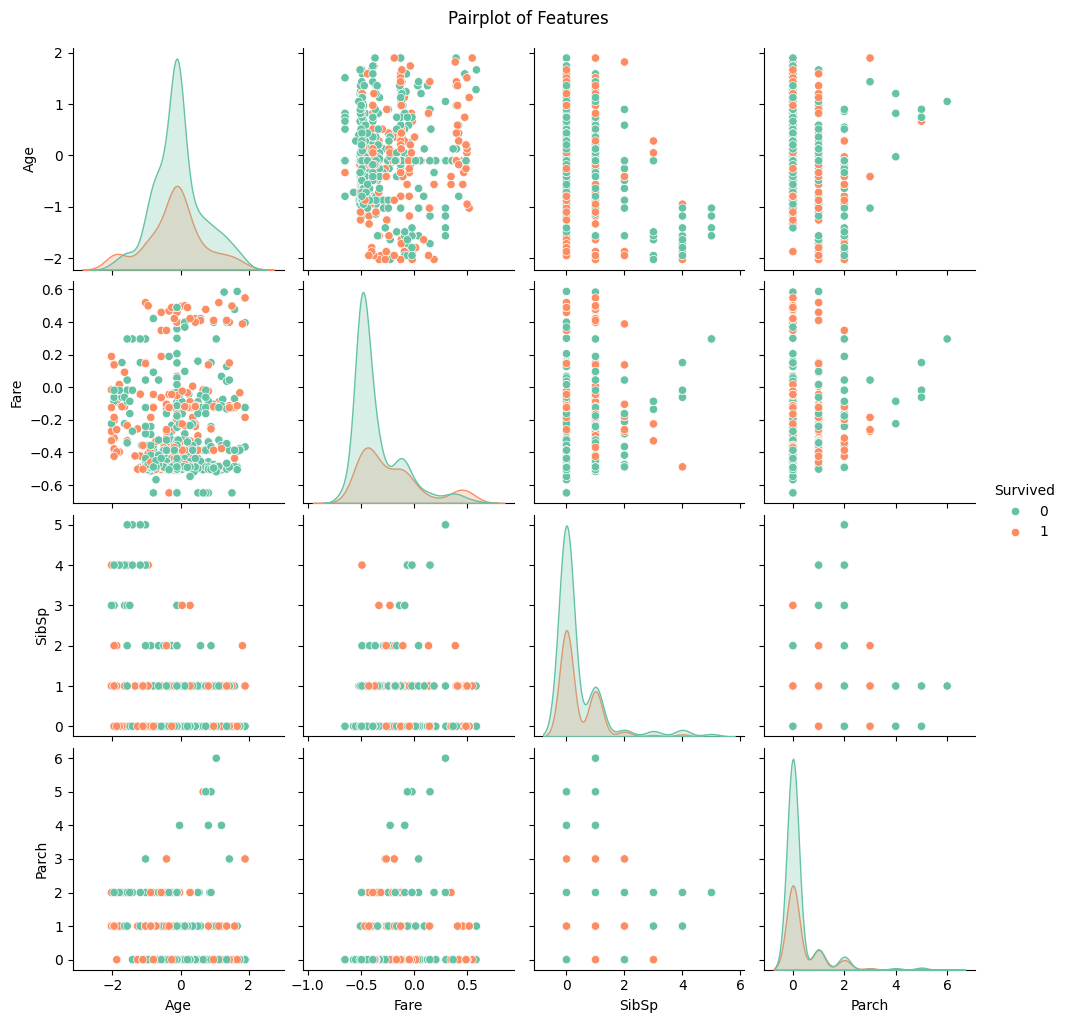


--- Basic Inferences ---


1. Younger passengers had slightly higher survival rates.
2. Higher fare passengers were more likely to survive.
3. Correlation matrix shows Fare and Pclass are related.
4. Boxplots revealed outliers in Fare feature.
5. Pairplots show that number of siblings/spouses (SibSp) has a slight relationship with survival.



In [25]:
print("\n--- Summary Statistics ---\n")
print(df.describe())

print("\n--- Dataset Info ---\n")
print(df.info())

print("\n--- Null Values ---\n")
print(df.isnull().sum())

# Step 4: Histograms for Numeric Features
numeric_features = ['Age', 'Fare', 'SibSp', 'Parch']

plt.figure(figsize=(12,8))
for i, col in enumerate(numeric_features):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

# Step 5: Boxplots for Outliers
plt.figure(figsize=(12,8))
for i, col in enumerate(numeric_features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# Step 6: Correlation Matrix and Heatmap
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Now calculate correlation
corr_matrix = numeric_df.corr()

# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix (Numeric Features Only)')
plt.show()


# Step 7: Pairplot for feature relationships
sns.pairplot(df[['Survived', 'Age', 'Fare', 'SibSp', 'Parch']], hue='Survived', palette='Set2')
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

# Step 8: Interactive Plotly Visualizations

# Age vs Survived
fig = px.histogram(df, x='Age', color='Survived', nbins=30, title="Age Distribution by Survival")
fig.show()

# Fare vs Survived
fig = px.box(df, x='Survived', y='Fare', color='Survived', title="Fare Distribution by Survival")
fig.show()

# Step 9: Feature-level Inferences
print("\n--- Basic Inferences ---\n")
print("""
1. Younger passengers had slightly higher survival rates.
2. Higher fare passengers were more likely to survive.
3. Correlation matrix shows Fare and Pclass are related.
4. Boxplots revealed outliers in Fare feature.
5. Pairplots show that number of siblings/spouses (SibSp) has a slight relationship with survival.
""")
